In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/board-games/8. games.csv


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [28]:
df = pd.read_csv('/kaggle/input/board-games/8. games.csv') # Reads the file

In [29]:
df.shape # Prints shape of 'df'

(81312, 20)

In [30]:
df.head() # Displays the first five rows of ‘df’.

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [31]:
df.columns # Prints all the columns of 'df'

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [32]:
df.nunique() # Prints number of unique elements in each column

id                      79463
type                        2
name                    76035
yearpublished             323
minplayers                 24
maxplayers                 89
playingtime               134
minplaytime               123
maxplaytime               134
minage                     35
users_rated              2147
average_rating          17564
bayes_average_rating    12681
total_owners             2995
total_traders             407
total_wanters             540
total_wishers            1130
total_comments           1216
total_weights             657
average_weight           3376
dtype: int64

In [33]:
df.describe() # Displays properties of each column

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


(array([24380.,     0., 11306.,     0.,  6089.,     0.,  3970.,     0.,
         2818.,  2219.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

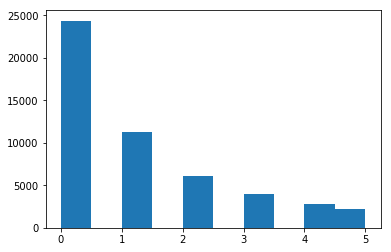

In [34]:
plt.hist(df['users_rated'],range = (0,5)) # Histogram of 'users_rated' column

(array([6.0000e+00, 2.0000e+00, 5.0000e+00, 6.0000e+00, 0.0000e+00,
        4.0000e+00, 7.6810e+03, 1.3000e+01, 4.1000e+01, 7.3551e+04]),
 array([-3500. , -2948.2, -2396.4, -1844.6, -1292.8,  -741. ,  -189.2,
          362.6,   914.4,  1466.2,  2018. ]),
 <a list of 10 Patch objects>)

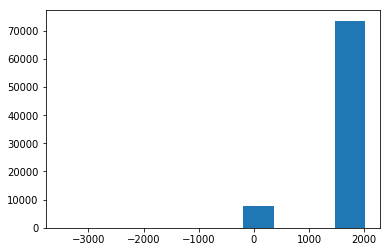

In [35]:
plt.hist(df['yearpublished']) # Histogram of 'yearpublished' column

In [36]:
df[(df['maxplayers'] == 0) | (df['maxplaytime'] == 0)] # Displays the rows when either of mentioned variables is 0.


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
657,160902,boardgame,Dungeons & Dragons Dice Masters: Battle for Faern,2015.0,2.0,2.0,0.0,60.0,0.0,14.0,621,7.82241,6.57014,1941,85,73,185,150,45,2.0889
929,153016,boardgame,Telestrations: 12 Player Party Pack,2011.0,4.0,12.0,0.0,0.0,0.0,12.0,413,7.88981,6.37987,966,6,54,131,80,14,1.0000
1211,37301,boardgame,Decktet,2008.0,0.0,0.0,30.0,30.0,30.0,0.0,366,7.58172,6.22832,1157,42,46,225,256,29,1.9655
1342,52328,boardgame,Malifaux,2009.0,2.0,2.0,0.0,0.0,0.0,0.0,338,7.66586,6.16904,680,22,25,78,104,36,3.2500
1516,29285,boardgame,Case Blue,2007.0,1.0,2.0,0.0,0.0,0.0,12.0,224,8.26528,6.09953,572,3,116,323,113,66,4.5758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81294,184349,boardgame,"The Luzon Campaign, 1945",2018.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81299,184368,boardgame,Bone Head,2015.0,2.0,9.0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81303,184403,boardgame,Big Dope Deal,2008.0,2.0,6.0,0.0,60.0,0.0,18.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


In [37]:
df[df['minplaytime'] > df['maxplaytime']].count() # Displays count of rows where 'minplaytime' > 'maxplaytime'

id                      600
type                    600
name                    600
yearpublished           600
minplayers              600
maxplayers              600
playingtime             600
minplaytime             600
maxplaytime             600
minage                  600
users_rated             600
average_rating          600
bayes_average_rating    600
total_owners            600
total_traders           600
total_wanters           600
total_wishers           600
total_comments          600
total_weights           600
average_weight          600
dtype: int64

In [38]:
df[df['minplayers'] > df['maxplayers']].count() # Displays count of rows where 'minplayers' > 'maxplayers'

id                      4020
type                    4020
name                    4019
yearpublished           4020
minplayers              4020
maxplayers              4020
playingtime             4020
minplaytime             4020
maxplaytime             4020
minage                  4020
users_rated             4020
average_rating          4020
bayes_average_rating    4020
total_owners            4020
total_traders           4020
total_wanters           4020
total_wishers           4020
total_comments          4020
total_weights           4020
average_weight          4020
dtype: int64

In [ ]:
# PREPROCESSING THE DATA

In [40]:
df.drop(['id','type','name','bayes_average_rating'],axis = 1,inplace = True) # Dropping columns that don't influence 'average_rating'

In [41]:
df.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,44362,795,861,5414,9173,5213,3.2943


In [42]:
df.isnull().sum() # Prints number of null values in each column

yearpublished     3
minplayers        3
maxplayers        3
playingtime       3
minplaytime       3
maxplaytime       3
minage            3
users_rated       0
average_rating    0
total_owners      0
total_traders     0
total_wanters     0
total_wishers     0
total_comments    0
total_weights     0
average_weight    0
dtype: int64

In [43]:
df.dropna(axis = 0,inplace = True) # Drops rows with null values.

In [44]:
df[df['users_rated'] == 0].count() # Prints count of rows where 'users_rated' = 0

yearpublished     24379
minplayers        24379
maxplayers        24379
playingtime       24379
minplaytime       24379
maxplaytime       24379
minage            24379
users_rated       24379
average_rating    24379
total_owners      24379
total_traders     24379
total_wanters     24379
total_wishers     24379
total_comments    24379
total_weights     24379
average_weight    24379
dtype: int64

In [45]:
df.drop(df[df['users_rated'] == 0].index,inplace = True) # Drops rows where 'users_rated' = 0

In [46]:
df[df['users_rated'] == 0].count()

yearpublished     0
minplayers        0
maxplayers        0
playingtime       0
minplaytime       0
maxplaytime       0
minage            0
users_rated       0
average_rating    0
total_owners      0
total_traders     0
total_wanters     0
total_wishers     0
total_comments    0
total_weights     0
average_weight    0
dtype: int64

In [47]:
# Swaps 'minplayers' with 'maxplayers' when 'minplayers'>'maxplayers'
a = (df['minplayers'] > df['maxplayers'])
df.loc[a,['minplayers','maxplayers']] = df.loc[a,['maxplayers','minplayers']].values

In [48]:
# Swaps 'minplaytime' with 'maxplaytime' when 'minplayers'>'maxplayers'
b = (df['minplaytime'] > df['maxplaytime'])
df.loc[b,['minplaytime','maxplaytime']] = df.loc[b,['maxplaytime','minplaytime']].values

In [49]:
df[df['minplaytime'] > df['maxplaytime']].count() # Checking if values have been properly swapped

yearpublished     0
minplayers        0
maxplayers        0
playingtime       0
minplaytime       0
maxplaytime       0
minage            0
users_rated       0
average_rating    0
total_owners      0
total_traders     0
total_wanters     0
total_wishers     0
total_comments    0
total_weights     0
average_weight    0
dtype: int64

In [50]:
df[df['minplayers'] > df['maxplayers']].count() # Checking if values have been properly swapped


yearpublished     0
minplayers        0
maxplayers        0
playingtime       0
minplaytime       0
maxplaytime       0
minage            0
users_rated       0
average_rating    0
total_owners      0
total_traders     0
total_wanters     0
total_wishers     0
total_comments    0
total_weights     0
average_weight    0
dtype: int64

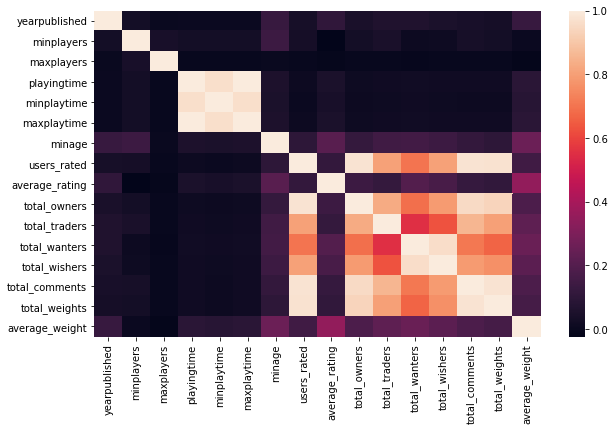

In [51]:
plt.figure(figsize = (10,6)) # Adjusting figure size.
sns.heatmap(df.corr()) # Displays heatmap of correlations between variables in 'df'.

In [53]:
# 'average_rating' has good correlation with 'minage','total_wanters' and 'average_weight'

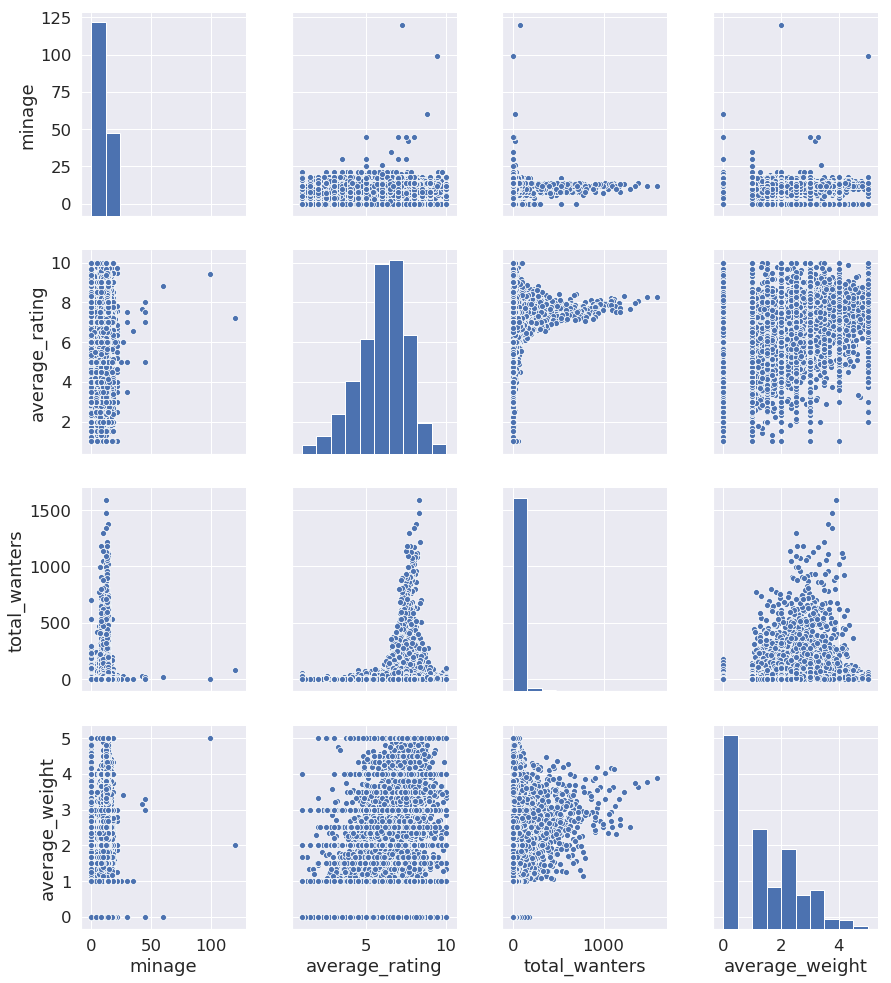

In [52]:
sns.set(font_scale = 1.5)
sns.pairplot(df[['minage','average_rating','total_wanters','average_weight']],height = 3.5,aspect = 0.9)


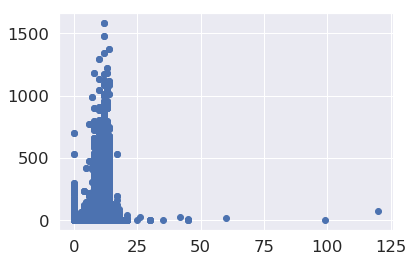

In [54]:
# Scatter plot of 'minage' and 'total_wanters
'
plt.scatter(df['minage'],df['total_wanters'])

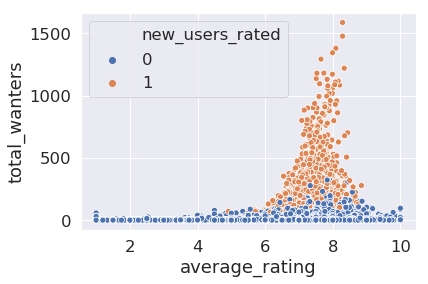

In [57]:
# Scatter plot of 'total_wanters' and 'average_rating'. Red points have 'users_rated' greater than 
# mean value of df['users_rated']. Blue points have 'users_rated' lesser than mean value of df['users_rated']
df['new_users_rated'] = df['users_rated'].apply(lambda x: 1 if x>df['users_rated'].mean() else 0)
sns.scatterplot('average_rating','total_wanters',data = df,hue = 'new_users_rated',legend = 'full')


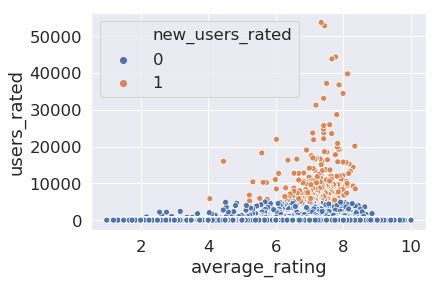

In [58]:
# Scatter plot of 'users_rated' and 'average_rating'. Red points have 'users_rated' greater than 5000
# Blue points have 'users_rated' lesser than 5000

df['new_users_rated'] = df['users_rated'].apply(lambda x: 1 if x>5000 else 0)
sns.scatterplot('average_rating','users_rated',data = df,hue = 'new_users_rated')
df.drop('new_users_rated',axis = 1,inplace = True)


In [59]:
X = df.drop('average_rating',1) # X is input
y = df['average_rating'] # y is output
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2) # Spitting into 'Train_set_new' and 'Test_set'.

In [60]:
validation_type = model_selection.KFold(n_splits = 10) # K-Fold cross validation technique is used.
cross_validation_result1 = model_selection.cross_val_score(LinearRegression(),X_train,y_train,cv = validation_type,scoring = 'neg_mean_squared_error') # Cross validation score of SVC model.
cross_validation_result2 = model_selection.cross_val_score(RandomForestRegressor(),X_train,y_train,cv = validation_type,scoring = 'neg_mean_squared_error') # Cross validation score of KNN model.
print(cross_validation_result1.mean(),cross_validation_result2.mean())

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

-2.1454557464005455 -1.6321702551847577


In [61]:
a = LinearRegression().fit(X_train,y_train) # Fitting the model.
predictions = a.predict(X_test) # Test set is predicted.
print(mean_squared_error(y_test,predictions)) # Mean squared error is calculated.


2.0720389044487133


In [62]:
b = RandomForestRegressor().fit(X_train,y_train) # Fitting the model.
predictions = b.predict(X_test) # Test set is predicted.
print(mean_squared_error(y_test,predictions)) # Mean squared error is calculated.


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.6051562966165045


In [63]:
# Predicted Ratings
prediction = b.predict(df.iloc[[42,97]].drop('average_rating',1))
print(prediction)

[7.851644 7.686837]


In [64]:
# Actual Ratings
df.iloc[[42,97]]['average_rating']

42    7.86088
97    7.67833
Name: average_rating, dtype: float64

In [ ]:
# The Predicting Ratings are very close to Actual Ratings. The model has been trained well.